In [64]:
import pickle

In [65]:
with open('/home/hadoop/result_list.pickle','rb') as f:
    data = pickle.load(f)

In [66]:
clean_d=[]
for i in data:
    clean_d.append(i.replace('Within Set Sum of Squared Error = ','').replace('for k =','').split())
    

In [67]:
from matplotlib import pyplot as plt

In [68]:
x=[]
y=[]
for i in clean_d:
    x.append(int(i[1]))
    y.append(float(i[0]))

In [69]:
min(x)

2

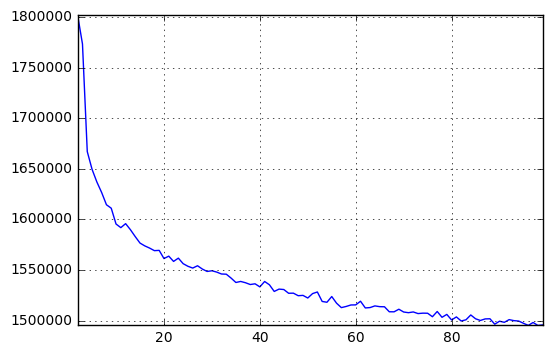

In [85]:
fig, ax = plt.subplots()

ax.grid(True)
ax.plot(x,y)
plt.axis([min(x),max(x),min(y),max(y)])
plt.show()

In [71]:
from pyspark.mllib.clustering import KMeans, KMeansModel

In [72]:
sameModel = KMeansModel.load(sc, "hdfs:///user/home/hadoop/cluster_model/cluster_model_k_17")

In [73]:
with open('/home/hadoop/success_vec_protocol_1.pickle','rb') as objectf:
    data = pickle.load(objectf)

In [74]:
keys_rdd = sc.parallelize(list(data.keys()))

In [75]:
key_value_rdd = keys_rdd.map(lambda x: (x,data[x].reshape((4096,))))

In [76]:
array_rdd = key_value_rdd.map(lambda (k,v):v)

In [77]:
from scipy.spatial.distance import euclidean

In [78]:
distance = array_rdd.map(lambda point :(sameModel.predict(point),euclidean(point,sameModel.centers[sameModel.predict(point)])))

In [79]:
radius = distance.reduceByKey(max)

# Cluster Radius

In [80]:
radius.collect()

[(0, 384.53989663911057),
 (8, 350.2250297052688),
 (4, 286.99718308966584),
 (12, 366.1748040598126),
 (16, 260.2077201582386),
 (1, 303.509521851893),
 (13, 304.6827525488093),
 (5, 333.40630591665126),
 (9, 395.7292136978472),
 (2, 375.49031747982946),
 (14, 430.0844557188018),
 (10, 255.91134005287276),
 (6, 295.8650964110999),
 (11, 0.0),
 (15, 334.59170424230433),
 (3, 272.44843825318327),
 (7, 319.45044279866215)]

In [81]:
rd_hash = array_rdd.map(lambda point :(sameModel.predict(point),point))

In [82]:
rd_group = rd_hash.groupByKey()

In [83]:
group = rd_group.collect()

# Number of images in Cluster

In [84]:
for i in group:
    print (i[0],len([j for j in i[1]]))

(0, 579)
(8, 440)
(4, 428)
(12, 494)
(16, 18)
(1, 934)
(13, 403)
(5, 512)
(9, 536)
(2, 891)
(14, 991)
(10, 355)
(6, 1048)
(11, 542)
(15, 502)
(3, 424)
(7, 794)


### Cluster 16 is next smallest cluster

In [132]:
for i in group:
    if i[0]==16:
        d =[j for j in i[1]]

In [133]:
for idx,val in enumerate(d):
    d[idx]=val.reshape((1,4096))

In [25]:
import random

In [200]:
#test_d = d

In [28]:
reverse_hash = key_value_rdd.map(lambda(k,v):(k,v.reshape((1,4096))))

In [29]:
t = reverse_hash.take(1)

In [30]:
t[0][1].shape

(1, 4096)

In [134]:
d[0].shape

(1, 4096)

In [38]:
import numpy as np

In [135]:
brod = sc.broadcast(d)

In [136]:
def fil(k,v):
    for i in brod.value:
        if np.array_equal(i,v):
            return k

In [137]:
subset = reverse_hash.filter(lambda (k,v):fil(k,v)).collect()

In [53]:
dummy = reverse_hash.collect()

In [138]:
len(subset)

18

In [139]:
img_dir = '/mnt/homes_img'

In [130]:
#random_sample = random.sample(subset,20)

In [140]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.ndimage import imread

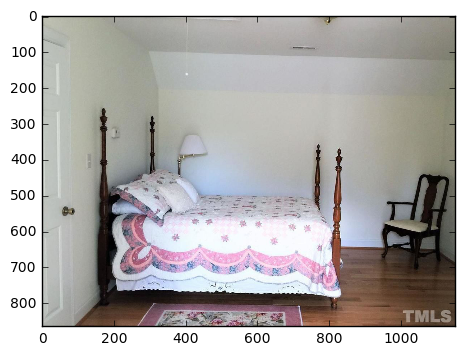

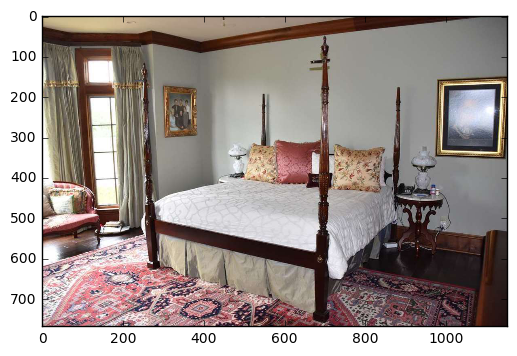

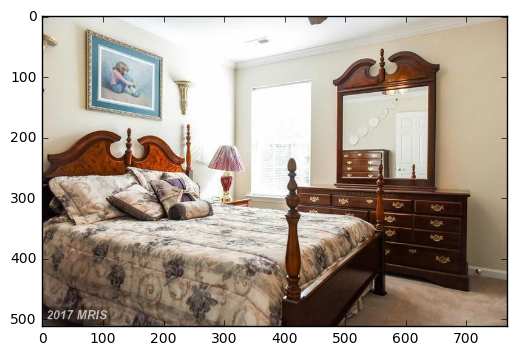

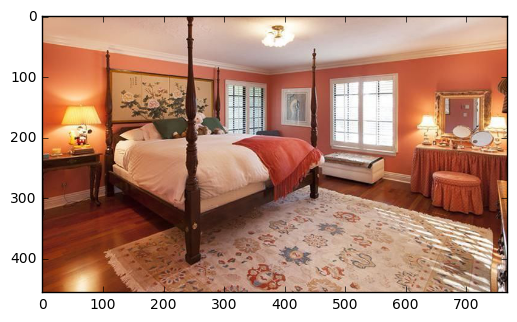

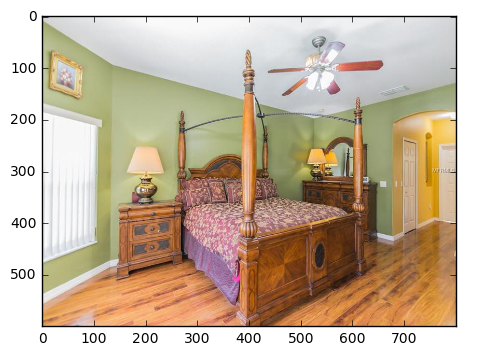

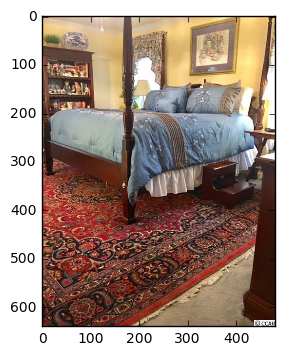

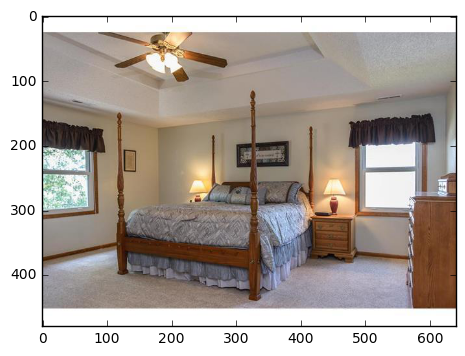

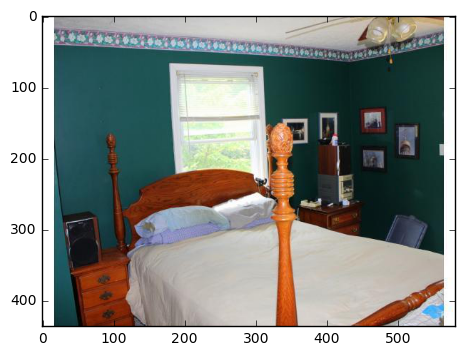

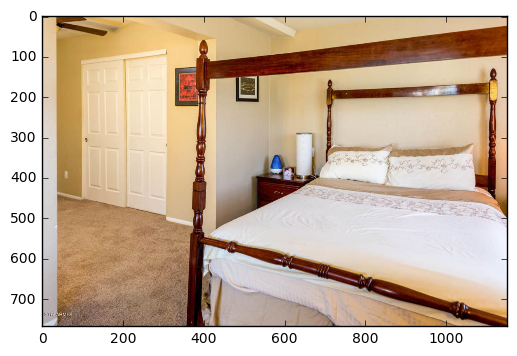

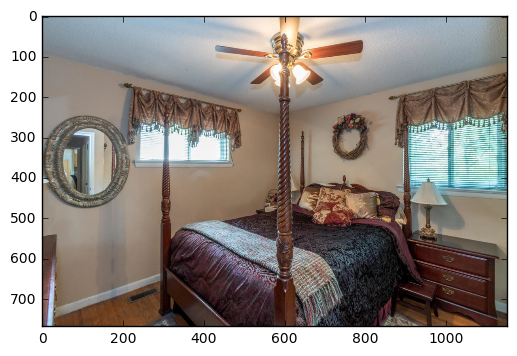

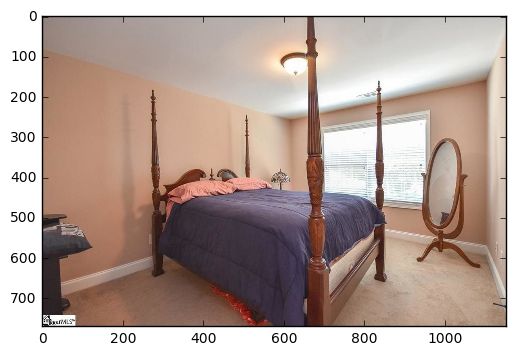

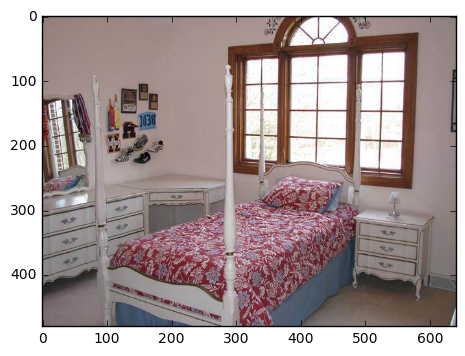

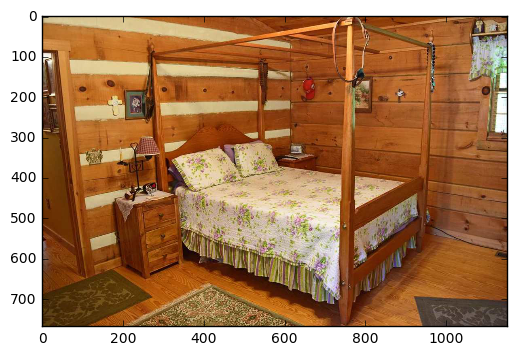

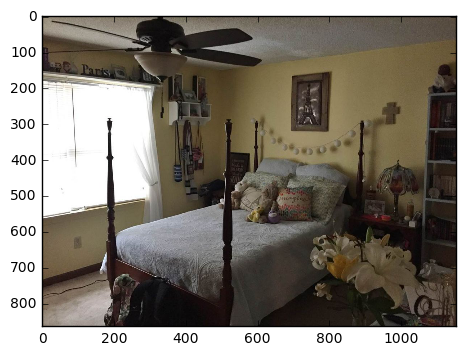

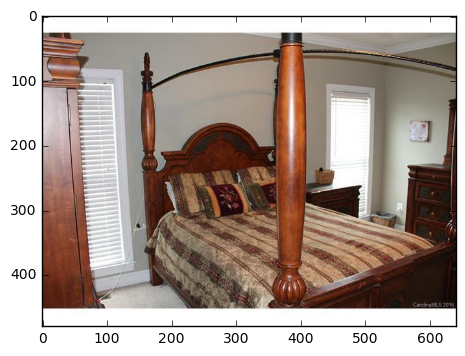

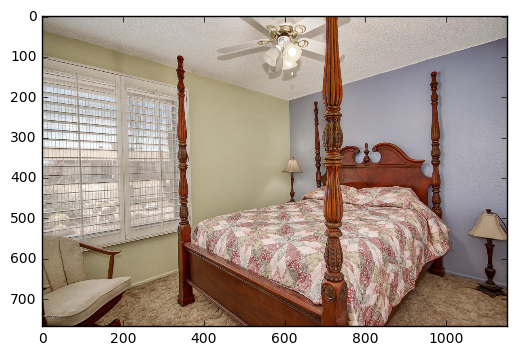

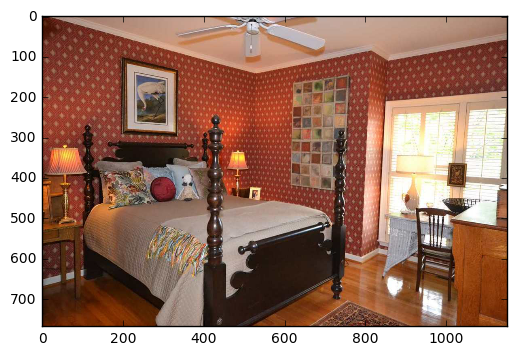

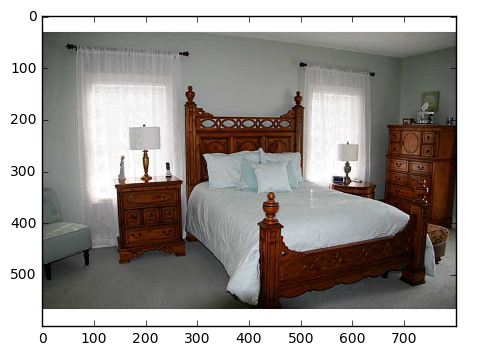

In [142]:
for i in subset:
    test_img = imread(img_dir+"/"+i[0])
    plt.imshow(test_img)
    plt.show()